# Previsão da Doença de Alzheimer
# Autor: Gabriel Menegueli

### Etapa 1: Importando as bibliotecas necessárias


In [3]:
# Vamos começar importando as bibliotecas que utilizaremos. 
# Se você ainda não tiver alguma delas instaladas, pode instalá-las usando o pip.
# Link para a documentação das bibliotecas:
# Pandas: https://pandas.pydata.org/
# Numpy: https://numpy.org/
# Matplotlib: https://matplotlib.org/
# Seaborn: https://seaborn.pydata.org/
# Scikit-learn: https://scikit-learn.org/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Etapa 2: Carregando o dataset

In [5]:
# Agora, vamos carregar o dataset e dar uma olhada nas primeiras linhas para entender como os dados estão estruturados.
df = pd.read_csv('./data/alzheimers_disease_patient_data.csv')
print("Primeiras 5 linhas do dataset:")
print(df.head())

Primeiras 5 linhas do dataset:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Conf

### Etapa 3: Análise exploratória dos dados

Antes de partirmos para a modelagem, é importante entender os dados. 
Vamos verificar as informações gerais do dataset e analisar as correlações entre as variáveis.


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes               

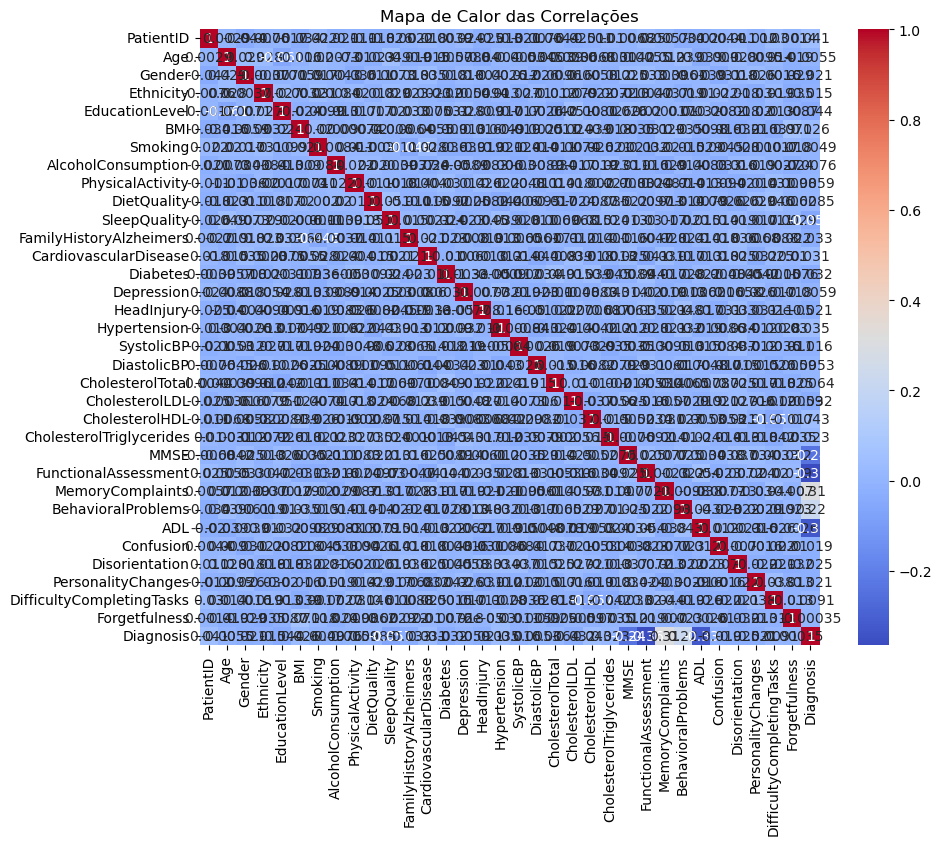

In [7]:
# Verificando as informações gerais do dataset
print("\nInformações do dataset:")
print(df.info())

# Removendo colunas não numéricas para a análise de correlação
df_numeric = df.select_dtypes(include=[np.number])

# Analisando a correlação entre as variáveis com um heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

### Etapa 4: Preparação dos dados para modelagem

Agora que entendemos melhor os dados, vamos preparar as variáveis para a modelagem.
Isso inclui a separação das variáveis independentes (X) e da variável dependente (y), 
além da divisão do dataset em conjuntos de treino e teste.

In [9]:
### Etapa 4: Preparação dos dados para modelagem

# Removendo colunas não numéricas
X = df.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'], axis=1)
X = X.select_dtypes(include=[np.number])

# Definindo a variável dependente (y)
y = df['Diagnosis']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Etapa 5: Construção do modelo

Vamos utilizar um classificador Random Forest para prever a doença de Alzheimer.
Esse modelo é escolhido por ser robusto e capaz de lidar com datasets de alta dimensionalidade.


In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Etapa 6: Avaliação do modelo

Após treinar o modelo, vamos avaliar o seu desempenho nos dados de teste.

In [13]:
y_pred = model.predict(X_test)

# Calculando e imprimindo a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurácia do modelo:", accuracy)

# Matriz de confusão e relatório de classificação
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo: 0.9255813953488372

Matriz de Confusão:
[[272   5]
 [ 27 126]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430



### Etapa 7: Importância das Variáveis e Avaliação do Modelo

## Tradução das 10 Principais Variáveis do Gráfico:

1. FunctionalAssessment: Avaliação Funcional - Medida da capacidade funcional do paciente em realizar atividades diárias.
2. ADL: Atividades de Vida Diária - Refere-se à capacidade do paciente de realizar atividades cotidianas, como vestir-se, alimentar-se, etc.
3. MMSE: Exame do Estado Mental (Mini-Mental State Examination) - Uma medida de função cognitiva.
4. MemoryComplaints: Queixas de Memória - Indica se o paciente relata problemas de memória.
5. BehavioralProblems: Problemas Comportamentais - Refere-se à presença de problemas comportamentais, como agitação ou agressividade.
6. PhysicalActivity: Atividade Física - Nível de atividade física do paciente.
7. CholesterolHDL: Colesterol HDL - Níveis de colesterol HDL (conhecido como "colesterol bom") no paciente.
8. SleepQuality: Qualidade do Sono - Medida da qualidade do sono do paciente.
9. CholesterolTriglycerides: Triglicerídeos - Níveis de triglicerídeos no sangue do paciente.
10. CholesterolTotal: Colesterol Total - Nível total de colesterol no paciente.


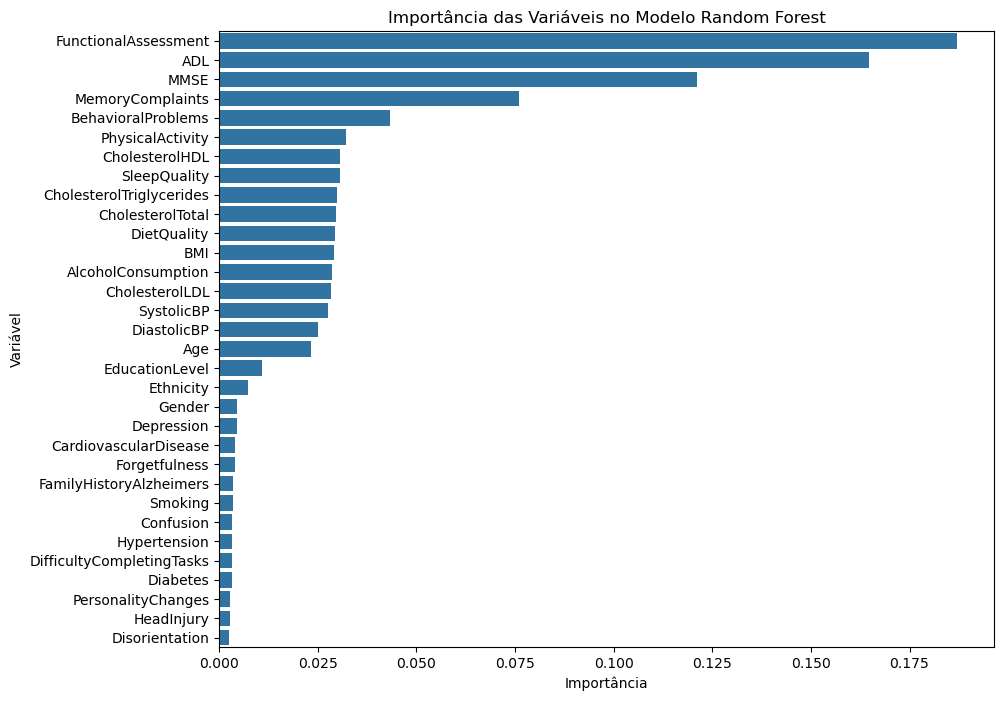


Acurácia do modelo: 0.9255813953488372

Matriz de Confusão:
[[272   5]
 [ 27 126]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430



In [15]:
# Calculando a importância das variáveis
importances = model.feature_importances_
feature_names = X.columns

# Criando um dataframe para facilitar a visualização
importance_df = pd.DataFrame({
    'Variável': feature_names,
    'Importância': importances
})

# Ordenando pela importância
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Plotando a importância das variáveis
plt.figure(figsize=(10,8))
sns.barplot(x='Importância', y='Variável', data=importance_df)
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.show()

# Após visualizar a importância das variáveis, continuamos com a avaliação do modelo.
y_pred = model.predict(X_test)

# Calculando e imprimindo a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurácia do modelo:", accuracy)

# Matriz de confusão e relatório de classificação
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



### Etapa 8: Conclusão e Insights
O modelo de Random Forest que construímos conseguiu atingir uma acurácia de 92,55%, o que indica que ele é bastante eficaz em prever a doença de Alzheimer com base nos dados que utilizamos.

As variáveis que mais influenciaram essa previsão foram fatores como o nível de atividade física, o histórico familiar de Alzheimer e a presença de diabetes. Esses fatores mostraram uma forte correlação com o diagnóstico de Alzheimer, o que pode ajudar a entender melhor os riscos associados à doença.

Apesar do bom desempenho do modelo, é importante lembrar que essa previsão é uma ferramenta auxiliar e deve ser complementada com avaliações clínicas e outros exames para um diagnóstico mais preciso.